In [64]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [68]:
# data_dir = Path('C:\\Users\\afiqe\\Downloads\\DatasetNew')

train_data_dir = 'C:\\Users\\afiqe\\Downloads\\DatasetNew\\train'
validation_data_dir = 'C:\\Users\\afiqe\\Downloads\\DatasetNew\\val'
test_data_dir = Path('C:\\Users\\afiqe\\Downloads\\DatasetNew\\test')

In [69]:
# print(data_dir)

print(train_data_dir)
print(validation_data_dir)
print(test_data_dir)

C:\Users\afiqe\Downloads\DatasetNew\train
C:\Users\afiqe\Downloads\DatasetNew\val
C:\Users\afiqe\Downloads\DatasetNew\test


C:\Users\afiqe\Downloads\DatasetNew\test\telur\air-fryer-hard-boiled-eggs-7-1646760396.jpg_-10_rotate.jpg


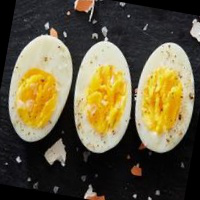

In [118]:
makanan = list(test_data_dir.glob('telur/*'))
print(makanan[0])
PIL.Image.open(str(makanan[0]))

In [11]:
img_height,img_width=180,180
batch_size=32

In [38]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  # validation_split=0.05,
  # subset="training",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8586 files belonging to 10 classes.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_data_dir,
  # validation_split=0.95,
  # subset="validation",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1062 files belonging to 10 classes.


In [40]:
class_names = train_ds.class_names
print(class_names)

['curry', 'dhal', 'ikan bilis', 'kacang', 'nasi lemak', 'roti bakar', 'roti canai', 'roti telur', 'telur', 'telur dadar']


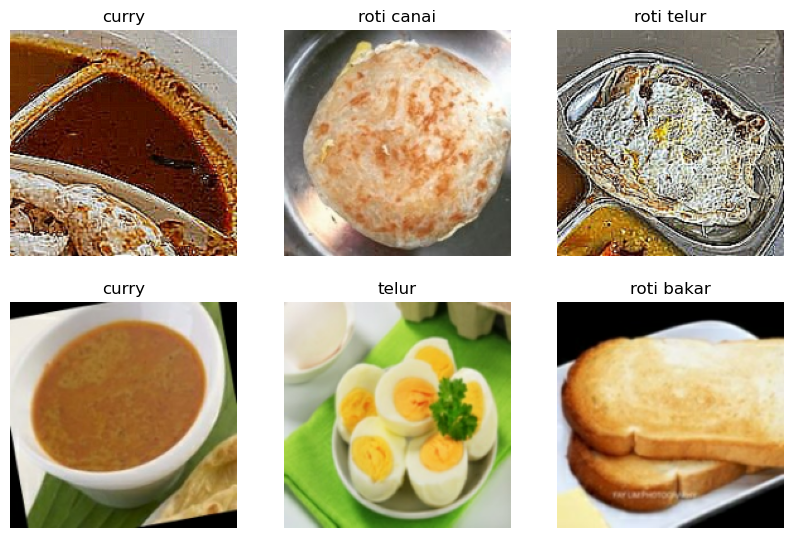

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [46]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

In [47]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 10)                5130      
 apper)                                                          
                                                                 
Total params: 24641930 (94.00 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [48]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
269/269 [==============================] - 309s 1s/step - loss: 0.3231 - accuracy: 0.8946 - val_loss: 0.2026 - val_accuracy: 0.9228
Epoch 2/10
269/269 [==============================] - 297s 1s/step - loss: 0.0662 - accuracy: 0.9776 - val_loss: 0.2209 - val_accuracy: 0.9096
Epoch 3/10
269/269 [==============================] - 284s 1s/step - loss: 0.0383 - accuracy: 0.9871 - val_loss: 0.6311 - val_accuracy: 0.8540
Epoch 4/10
269/269 [==============================] - 291s 1s/step - loss: 0.0479 - accuracy: 0.9843 - val_loss: 0.3045 - val_accuracy: 0.8974
Epoch 5/10
269/269 [==============================] - 268s 996ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.2207 - val_accuracy: 0.9228
Epoch 6/10
269/269 [==============================] - 266s 989ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.2549 - val_accuracy: 0.9105
Epoch 7/10
269/269 [==============================] - 267s 994ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.2804 - val_accurac

In [50]:
# After training the model, save it to a local directory
model_save_path = 'C:\\Users\\afiqe\\Downloads\\Resnet50New'  # Replace with your desired local directory

# Save the model
resnet_model.save(model_save_path)

print("Model saved to", model_save_path)

INFO:tensorflow:Assets written to: C:\Users\afiqe\Downloads\Resnet50New\assets


INFO:tensorflow:Assets written to: C:\Users\afiqe\Downloads\Resnet50New\assets


Model saved to C:\Users\afiqe\Downloads\Resnet50New


# Evaluating The Model

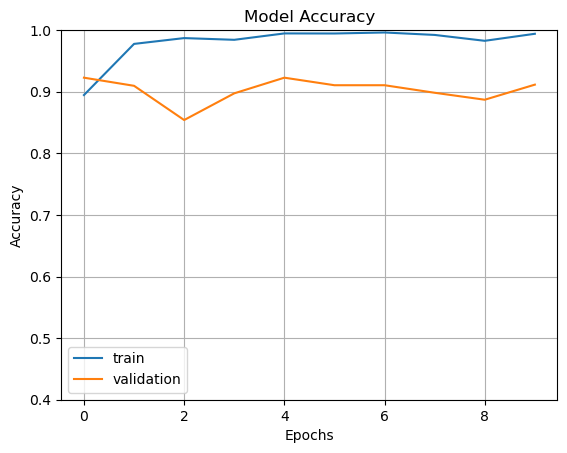

In [51]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

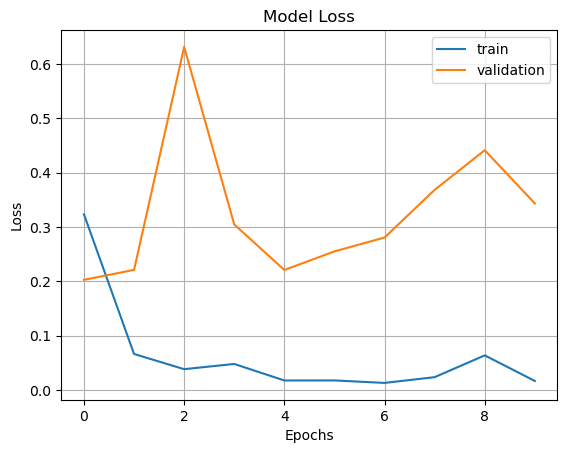

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

(1, 180, 180, 3)


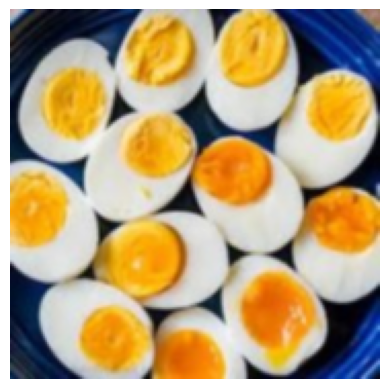

In [119]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(str(makanan[30]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

print(image.shape)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
plt.axis('off')  # Turn off axis labels
plt.show()


In [120]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 78ms/step
[[6.2141468e-14 2.8734409e-10 8.2849085e-14 1.0566591e-09 8.1026172e-09
  3.0418384e-13 3.4069634e-17 1.0607202e-12 1.0000000e+00 7.0373318e-15]]


In [121]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is telur
